# Aviation Safety Analysis

## Overview

This project analyzes aviation accident data from 1962-2023 that has been obtained from the National Transport Safety Board to assess safety risks and identify aircraft types with lowest operational risk. Analysis of accident patterns by aircraft make, model, weather and flight phase reveals key factors influencing the aviation safety. The findings will guide ou company's aircraft purchase decisions and support data-driven improvements in safety and regulatory compliance.

## Business Problem 
Our company seeks to identify patterns and trends in aviation accidents to reduce operational risks and improve aircraft selection decisions. By analyzing accident data by aircraft make, model, engine type, weather and flight phase. We aim to determine which factors contribute most to accidents and which aircraft are safest to operate. This analysis will guide evidence-based safety improvements, enhance confidence in airline operations and support data-driven purchasing and regulatory decisions.

## Business Objectives
1. To determine which aircraft makes, models, and engine types record the highest and lowest number of accidents.
2. To examine the relationship between accident severity (fatal, serious, minor injuries) and factors such as aircraft damage, weather conditions, and phase of flight.
3. To assess how accident occurrences vary over time to identify improvements or recurring safety challenges.
4. To identify the safest aircraft models based on accident counts and injury outcomes.
5. To generate clear visual insights (bar charts, line plots, box plots) that can support aviation authorities, manufacturers, and airlines in improving safety measures.

## Data Understanding

The aviation dataset,Aviation_Data, contains accident records from 1962 to 2023 with detailed information on aircraft make, model, weather, flight phase and injury severity. Initial exploration revealed issues such as duplicate records, inconsistent date formats and missing values in key fields like location, aircraft category and flight schedule. Thes gaps could affect the reliability of insights if left unaddressed. After cleaning and aggregating the data by removing duplicates, filling missing values and focusing on records from 1980 to 2023, the dataset provides a consistent and reliable foundation for analyzing accident causes, severity and trends in modern aviation.

In [1]:
import aviation_data_functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

aviation_data_info = aviation_data_functions.data_inspect()

There are 31 columns and 90348 rows

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')
Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2

In [7]:
aviation_data_info .head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation and Data Cleaning Procedure
Here, we clean the Aviation Data in order to give us clean results

In [3]:
#Drop the 1390 duplicates
dropped_duplicates_df = aviation_data_info.drop_duplicates(keep='first')
dropped_duplicates_df.shape

(88958, 31)

In [4]:
aviation_analysis_df = dropped_duplicates_df.drop(columns=['Event.Id','Investigation.Type','Country','Latitude','Longitude','Airport.Code','Airport.Name','Registration.Number','Schedule','Air.carrier','Report.Status','Publication.Date'])
aviation_analysis_df['Event.Date'] = pd.to_datetime(aviation_analysis_df['Event.Date'], errors='coerce')
aviation_analysis_df=aviation_analysis_df.dropna(subset=['Event.Date'])
aviation_analysis_df=aviation_analysis_df[(aviation_analysis_df['Event.Date'].dt.year >= 1980)&(aviation_analysis_df['Event.Date'].dt.year <=2023)]
aviation_analysis_df.shape

(88883, 19)

In [5]:
def clean_aviation_df(df):
    df.dropna(subset=['Make','Model'])
    
    fill_unknown_cols = ['Purpose.of.flight','Accident.Number','Location','Injury.Severity','Aircraft.damage','Aircraft.Category','Number.of.Engines','Engine.Type','Weather.Condition','Broad.phase.of.flight']
    
    for col in fill_unknown_cols:
        df[col] = df[col].fillna('Unknown')
        
    mode_fill_cols = ['Amateur.Built','FAR.Description','Purpose.of.flight']
    for col in mode_fill_cols:
        df[col].fillna(df[col].mode()[0])
        
    injury_cols = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
    
    for col in injury_cols:
        df[col].fillna(0)
    
        
    return df

In [6]:
aviation_analysis_df = clean_aviation_df(aviation_analysis_df)
print(aviation_analysis_df.isnull().sum())

Accident.Number               0
Event.Date                    0
Location                      0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines             0
Engine.Type                   0
FAR.Description           56861
Purpose.of.flight             0
Total.Fatal.Injuries      11400
Total.Serious.Injuries    12508
Total.Minor.Injuries      11931
Total.Uninjured            5911
Weather.Condition             0
Broad.phase.of.flight         0
dtype: int64


In [7]:
#Number of Engines with the highest accidents
aviation_analysis_df.groupby('Number.of.Engines').size()

Number.of.Engines
0.0         1226
1.0        69578
2.0        11078
3.0          483
4.0          431
6.0            1
8.0            3
Unknown     6083
dtype: int64

In [8]:
# Grouping Make and Models with the highest Accidents
make_accident_df = aviation_analysis_df.groupby(['Make'])['Accident.Number'].count().sort_values(ascending=False)
make_accident_df.head(20)

Make
Cessna               22225
Piper                12028
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  2134
Boeing                1594
BOEING                1151
Grumman               1094
Mooney                1092
BEECH                 1042
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
BELL                   588
Mcdonnell Douglas      525
Aeronca                487
Maule                  445
Name: Accident.Number, dtype: int64

In [12]:
# Aggregate by safe make and model counting total accidents
safety_by_model_df = aviation_analysis_df.groupby(['Make','Model']).agg({
    'Total.Fatal.Injuries': ['sum'],
    'Total.Minor.Injuries': ['sum'],
    'Total.Serious.Injuries': ['sum'],
    'Accident.Number': 'count' 
}).sort_values(('Accident.Number','count'), ascending=True)

safety_by_model_df.head(20)

,,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Serious.Injuries,Accident.Number
,,sum,sum,sum,count
Make,Model,,,,
de Havilland,Beaver DHC-2 MK.1,0.0,0.0,0.0,1
777,FF2,0.0,0.0,0.0,1
REIMS AVIATION SA,CESSNA F172N,0.0,0.0,0.0,1
67 Flying Dutchman,D1/LFD-13,0.0,0.0,0.0,1
5 RIVERS LLC,SQ-2,0.0,1.0,0.0,1
3XTRIM,450 ULTRA,1.0,1.0,0.0,1
REIMS AVIATION SA,CESSNA F150L,0.0,0.0,0.0,1
AB SPORTINE AVIACIJA,LAK 17,0.0,0.0,0.0,1


## Analysis

### Top 10 Aircraft Makes by Accident count

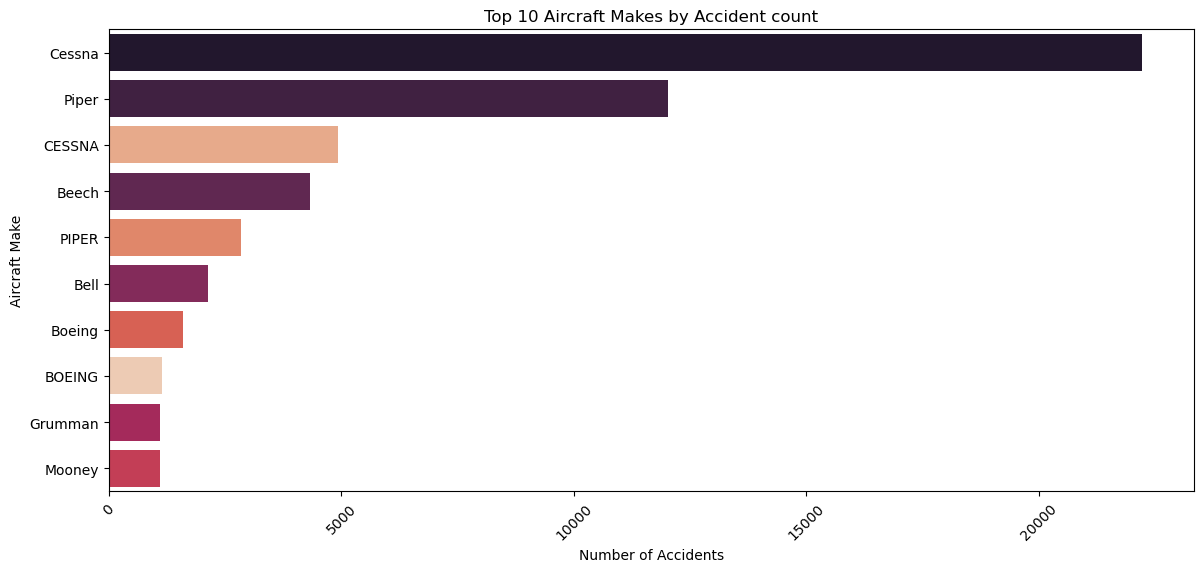

In [13]:
top_makes = make_accident_df.head(10).index
filtered_df = aviation_analysis_df[aviation_analysis_df['Make'].isin(top_makes)]

plt.figure(figsize=(14,6))
sns.countplot(data=filtered_df, y='Make', hue='Make', order=top_makes, palette='rocket', legend=False)
plt.title('Top 10 Aircraft Makes by Accident count')
plt.ylabel('Aircraft Make')
plt.xlabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### Injuries Comparison Across the Years

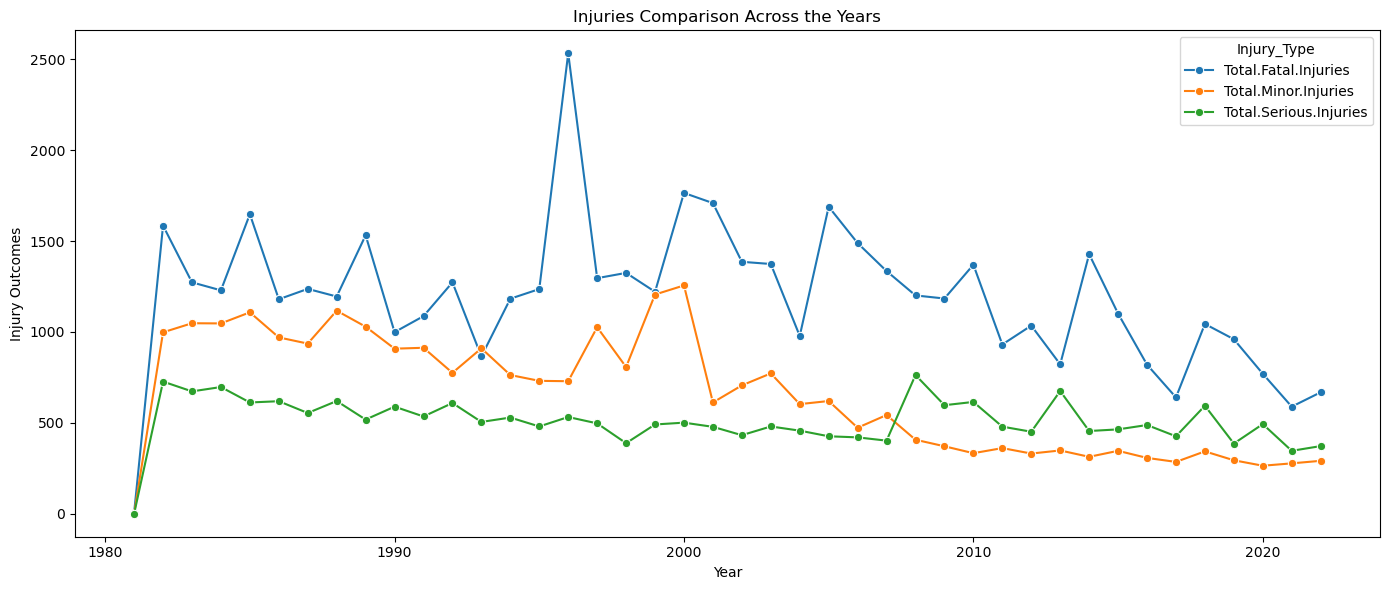

In [14]:
aviation_analysis_df['Year'] = aviation_analysis_df['Event.Date'].dt.year
injuries_by_year=(aviation_analysis_df.groupby('Year') [['Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries']].sum().reset_index())
injuries_melted = injuries_by_year.melt(id_vars='Year', value_vars=['Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries'], var_name='Injury_Type',value_name='Count')

plt.figure(figsize=(14,6))
sns.lineplot(data=injuries_melted, x='Year', y='Count', hue='Injury_Type', marker='o')
plt.title('Injuries Comparison Across the Years')
plt.xlabel('Year')
plt.ylabel('Injury Outcomes')
plt.tight_layout()
plt.show()

### Aircraft Categories by Aircraft Damage

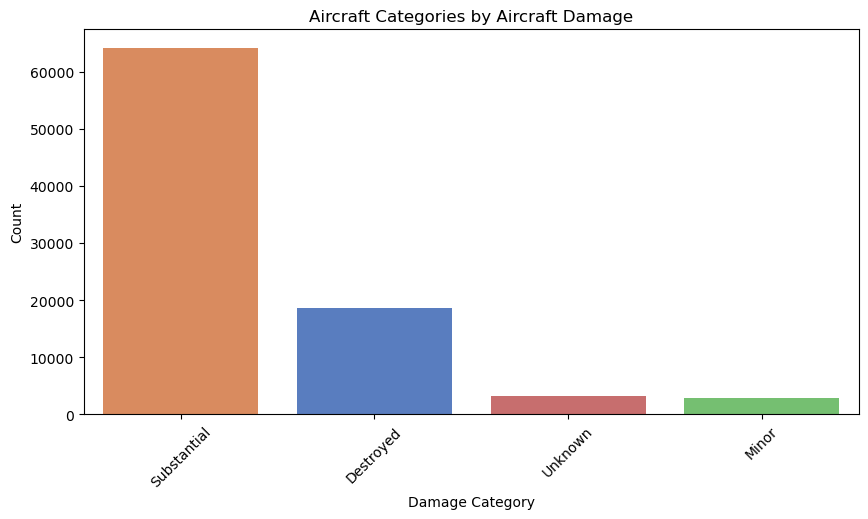

In [15]:
if 'Aircraft.damage' in aviation_analysis_df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=aviation_analysis_df, x='Aircraft.damage', hue='Aircraft.damage', order=aviation_analysis_df['Aircraft.damage'].value_counts().index, palette='muted', legend=False)
    plt.title('Aircraft Categories by Aircraft Damage')
    plt.xlabel('Damage Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Accidents by phase of flight

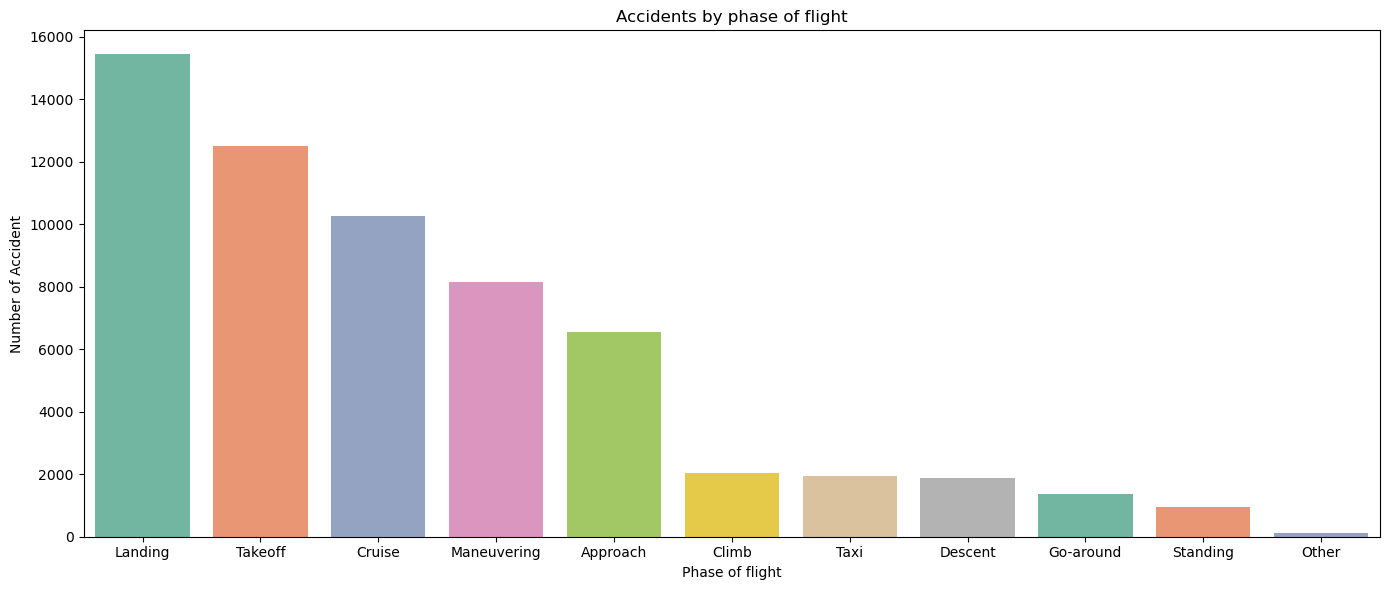

In [20]:
phase_counts = (aviation_analysis_df['Broad.phase.of.flight'].value_counts().reset_index())
phase_counts.columns = ['Phase_of_Flight','Accident_Count']
phase_counts = phase_counts[phase_counts['Phase_of_Flight'] !='Unknown']

plt.figure(figsize=(14,6))
sns.barplot(data=phase_counts, x='Phase_of_Flight', y='Accident_Count', hue='Phase_of_Flight', palette='Set2', legend=False)
plt.title('Accidents by phase of flight')
plt.xlabel('Phase of flight')
plt.ylabel('Number of Accident')
plt.tight_layout()
plt.show()

### Accident count by Engine Type

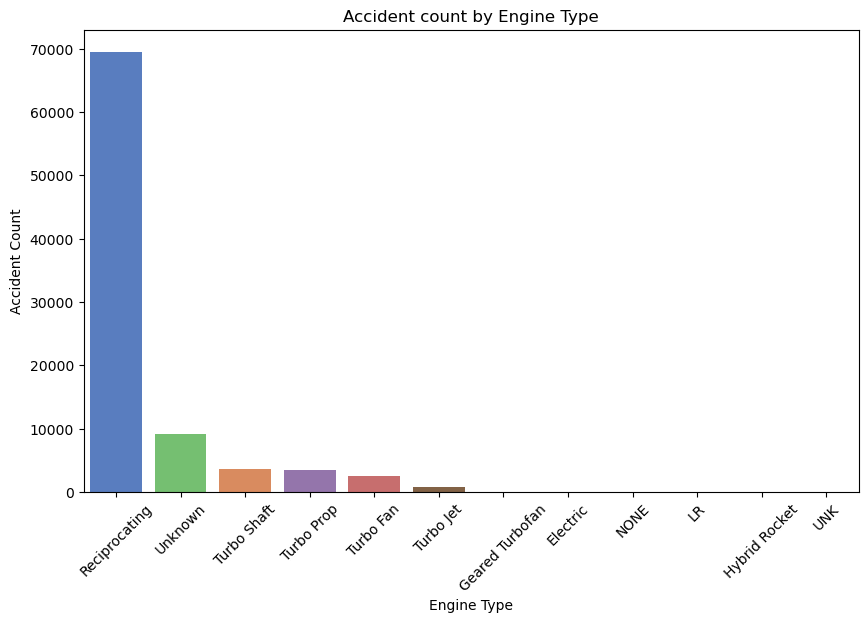

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=aviation_analysis_df, x='Engine.Type', hue='Engine.Type', order=aviation_analysis_df['Engine.Type'].value_counts().index, palette='muted', legend=False)
plt.title('Accident count by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

### Fatal Injuries Distribution by Aircraft Damage Level

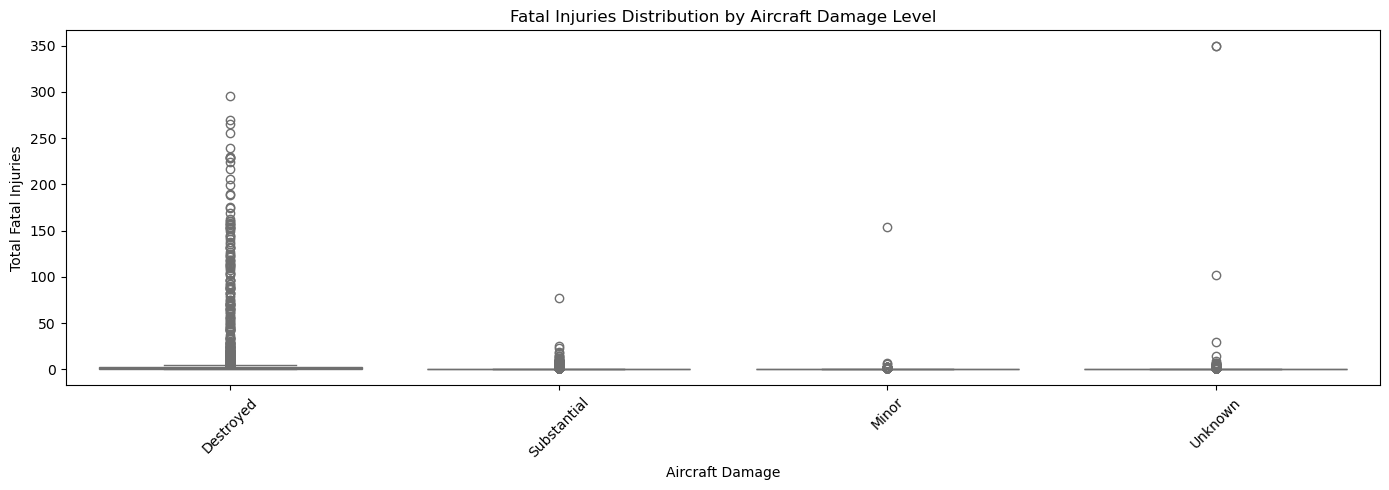

In [22]:
plt.figure(figsize=(14,5))
sns.boxplot(data=aviation_analysis_df, x='Aircraft.damage', y='Total.Fatal.Injuries', color='skyblue')

plt.title('Fatal Injuries Distribution by Aircraft Damage Level')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top 10 safest Aircraft Models with Lowest Accident Count

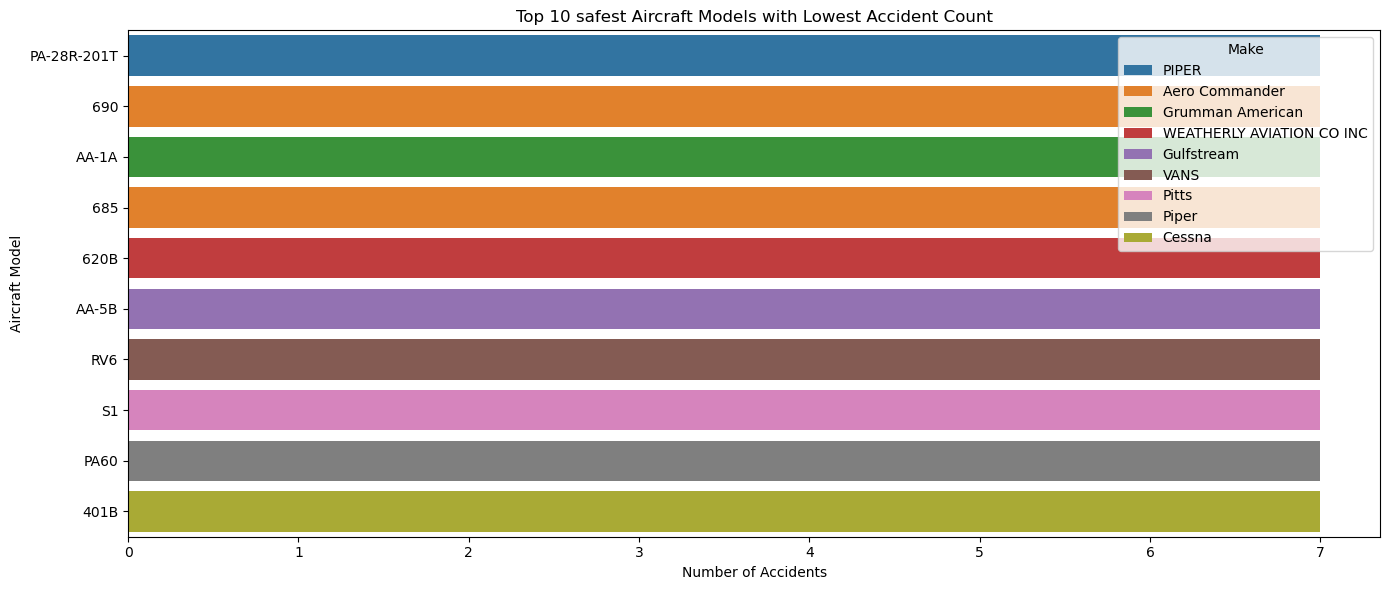

In [23]:
safety_summary = aviation_analysis_df.groupby(['Make','Model']).size().reset_index(name='Accident_Count')

safety_summary = safety_summary[safety_summary['Accident_Count'] >6]

plt.figure(figsize=(14,6))
sns.barplot(data=safety_summary.sort_values('Accident_Count').head(10), x='Accident_Count',y='Model', hue='Make', dodge=False)

plt.title('Top 10 safest Aircraft Models with Lowest Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.show()

## Conclusion and Recommendations

This analysis highlights critical insights into aviation safety trends and provides recommendations for enhancing safety practices. Data inconsistencies, particularly in recording aircraft makes such as “Cessna” versus “CESSNA,” distort accident counts and emphasize the importance of standardized data reporting for reliable statistical analysis. Although minor and serious injuries have declined since the 1980s, the persistence of fatality spikes demonstrates that catastrophic accidents, while less frequent, continue to exert a significant impact and warrant closer investigation into their causes. Furthermore, aircraft such as the Beaver DHC-2 MK.1 and Cessna F172N illustrate exceptional safety records, offering valuable lessons that can inform safer designs and operational practices. To address these issues, aviation authorities should enforce stricter data entry standards, increase regulatory oversight and pilot training for high-risk makes such as Cessna and Piper, and investigate the root causes of fatal accident surges. Simultaneously, highlighting safer aircraft models and integrating their design features into industry standards could strengthen safety outcomes. Finally, the development of predictive risk models based on historical accident patterns, weather conditions, and flight phases would allow stakeholders to anticipate risks and implement targeted, proactive interventions. Collectively, these measures form a comprehensive pathway toward reducing accidents, minimizing fatalities, and advancing aviation safety.


## Next Steps
Further analyses could provide deeper insights and actionable recommendations for aviation safety:

1. Data cleaning and normalization.
Standardize aircraft makes and models to eliminate duplicates (e.g., “Cessna” vs. “CESSNA”), ensuring accuracy in trend reporting.

2. Causal factor analysis.
Break down accidents by root causes (pilot error, mechanical issues, weather) to identify which areas most influence fatal outcomes and where interventions are most effective.

3. Aircraft safety benchmarking.
Expand on safe aircraft model analysis to build a benchmark of low-accident designs, which can inform manufacturers, regulators, and training institutions.

4. Predictive modeling for high-risk years or conditions.
Use historical injury and accident trends to forecast potential spikes, helping regulators and operators prepare resources in advance.

5. Policy and training recommendations.
Focus training and regulatory oversight on aircraft types and conditions with historically higher accident and injury rates.